In [38]:
using CSV;
raw = CSV.read("AMZN.csv",header = true)
open = raw[:,2];
close =raw[:,5]
x= 1:length(close);
x

1:21

In [39]:
close

21-element Array{Union{Missing, Float64},1}:
 1671.72998 
 1696.170044
 1692.430054
 1668.949951
 1625.949951
 1620.800049
 1670.619995
 1673.099976
 1690.810059
 1686.219971
 1712.359985
 1742.150024
 1761.849976
 1797.27002 
 1819.26001 
 1764.77002 
 1774.26001 
 1783.76001 
 1765.699951
 1773.420044
 1780.75    

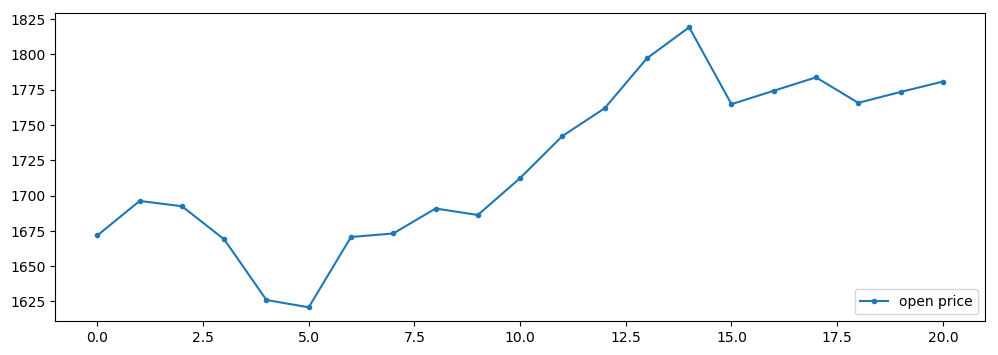

In [40]:
using PyPlot
figure(figsize=(12,4))
plot(close,".-");
legend(["open price", "closing price"], loc="lower right");

In [41]:
k = 5

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

In [42]:
uopt3=A\open
A

21×6 Array{Float64,2}:
      1.0             1.0     1.0    1.0   1.0  1.0
     32.0            16.0     8.0    4.0   2.0  1.0
    243.0            81.0    27.0    9.0   3.0  1.0
   1024.0           256.0    64.0   16.0   4.0  1.0
   3125.0           625.0   125.0   25.0   5.0  1.0
   7776.0          1296.0   216.0   36.0   6.0  1.0
  16807.0          2401.0   343.0   49.0   7.0  1.0
  32768.0          4096.0   512.0   64.0   8.0  1.0
  59049.0          6561.0   729.0   81.0   9.0  1.0
 100000.0         10000.0  1000.0  100.0  10.0  1.0
 161051.0         14641.0  1331.0  121.0  11.0  1.0
 248832.0         20736.0  1728.0  144.0  12.0  1.0
 371293.0         28561.0  2197.0  169.0  13.0  1.0
 537824.0         38416.0  2744.0  196.0  14.0  1.0
 759375.0         50625.0  3375.0  225.0  15.0  1.0
      1.04858e6   65536.0  4096.0  256.0  16.0  1.0
      1.41986e6   83521.0  4913.0  289.0  17.0  1.0
      1.88957e6  104976.0  5832.0  324.0  18.0  1.0
      2.4761e6   130321.0  6859.0  361.0 

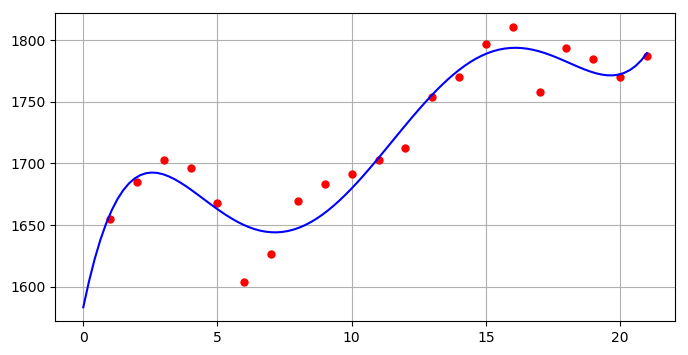

In [43]:
npts = 100
xfine = LinRange(0,21,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt3
figure(figsize=(8,4))
plot( x, open, "r.", markersize=10)
plot( xfine, yfine, "b-")
grid()

In [44]:
using JuMP, Gurobi;

λ= 10^-6
m= Model(solver=GurobiSolver(OutputFlag =0))
@variable(m, w[1:6])
@objective(m, Min, sum((A*w - close).^2)+λ*sum(w.^2))
solve(m)


opt_L2 = getvalue(w);


Academic license - for non-commercial use only


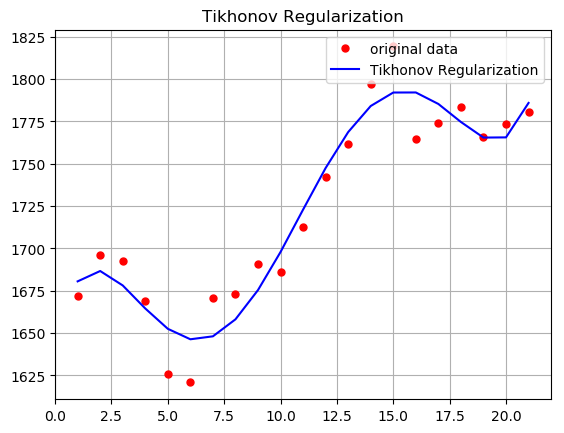

In [45]:
npts = 21
xfine = LinRange(minimum(x),maximum(x),npts)
ffine = ones(npts)
for j = 1:5
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * (opt_L2)

plot( x, close, "r.", markersize=10)
plot( xfine, yfine, "b-")
legend(["original data","Tikhonov Regularization"], loc="upper right");
title("Tikhonov Regularization")



grid()

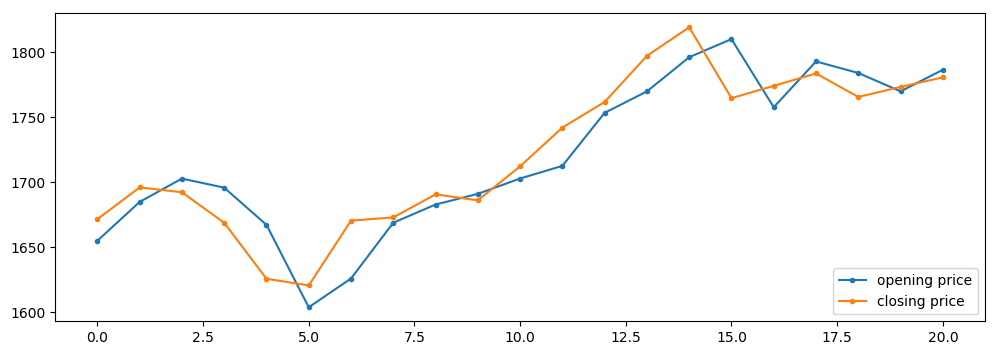

In [47]:

u = open
y = close;
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["opening price", "closing price"], loc="lower right");

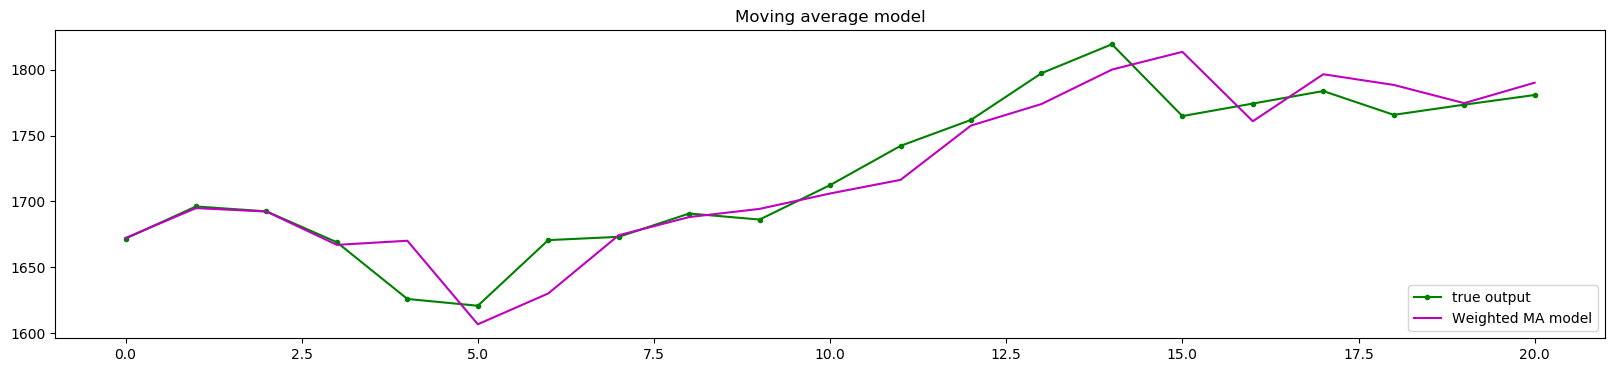


93.98280932713371


In [49]:
using LinearAlgebra

# generate A matrix. Using more width creates better fit.  (MA model)
width = 5

A = zeros(T,width)
for i = 1:width
    A[i:end,i] = u[1:end-i+1]
end
woptMA = A\y
yestMA = A*woptMA


figure(figsize=(20,4))
plot(y,"g.-",yestMA,"m-")
legend(["true output", "Weighted MA model","AR Model"], loc="lower right");
title("Moving average model");
println()
println(LinearAlgebra.norm(yestMA-y))

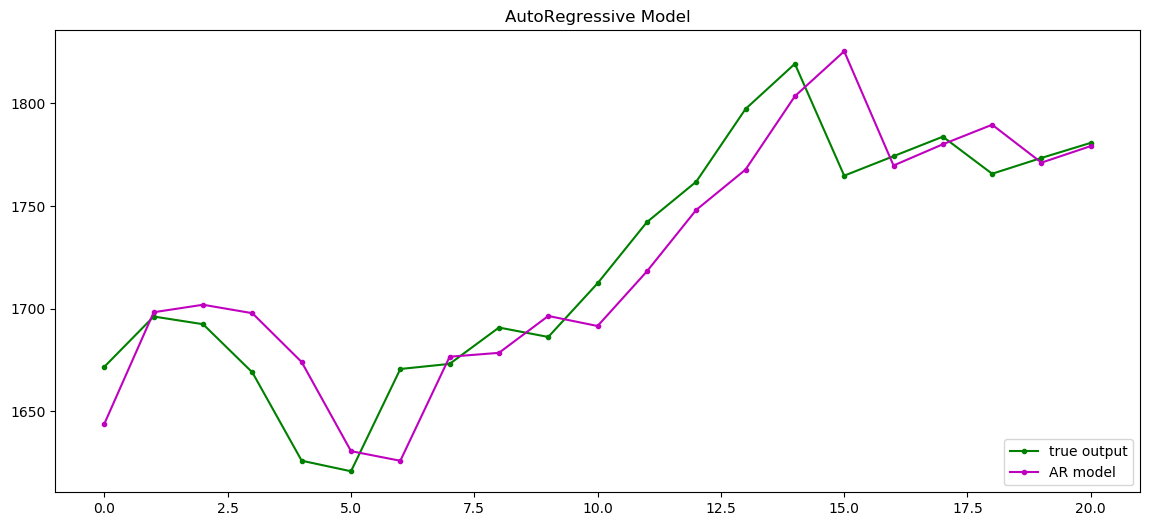


113.87769611760659


In [79]:
k =2
A2 = zeros(T,k)
for i = 1:k
    A2[i+1:end,i] = y[1:end-i]
end

replace = mean(A2, dims =1)

A2[1,1] = replace[1]
A2[1,2] = replace[2]
woptAR = A2\y
yestAR = A2 *woptAR

figure(figsize=(14,6))
plot(y,"g.-",yestAR,"m.-")

legend(["true output", "AR model"], loc="lower right");
title("AutoRegressive Model");
println()
println(LinearAlgebra.norm(yestAR-y))